### Download the Automobile data set
<b>Download link:</b> https://www.kaggle.com/toramky/automobile-dataset/discussion

<b>Summary:</b> Predict the price of a vehicle given other information about it



In [4]:
import numpy as np
import pandas as pd

In [2]:
automobile_data = pd.read_csv('Automobile_data.csv')
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
automobile_data = automobile_data.replace('?', np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
automobile_data = automobile_data.dropna()
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [8]:
#using only a few features

col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]

In [9]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [12]:
automobile_target = automobile_data[['price']]
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [13]:
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [14]:
pd.options.mode.chained_assignment = None

In [16]:
automobile_features['horsepower'] = \
                pd.to_numeric(automobile_features['horsepower'])

In [17]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [18]:
automobile_target['price'].describe()

count      159
unique     145
top       7957
freq         2
Name: price, dtype: object

In [19]:
automobile_target = automobile_target.astype(float)

In [21]:
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [22]:
automobile_features = pd.get_dummies(automobile_features,
                                    columns = ['make', 'fuel-type', 'body-style'])

In [23]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
from sklearn import preprocessing

In [27]:
automobile_features[['horsepower']] = \
                preprocessing.scale(automobile_features[['horsepower']])

In [28]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(automobile_features, automobile_target, test_size=0.2, random_state=42)
                                                      

In [68]:
y_train

,price
105,19699.0
179,15998.0
6,17710.0
120,6229.0
68,28248.0
64,11245.0
98,8249.0
159,7788.0
37,7895.0
178,16558.0


In [32]:
#training our neural network

import torch

dtype = torch.float

In [35]:
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(X_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [36]:
X_train_tensor.shape

torch.Size([127, 26])

In [67]:
Y_train_tensor

tensor([[19699.],
        [15998.],
        [17710.],
        [ 6229.],
        [28248.],
        [11245.],
        [ 8249.],
        [ 7788.],
        [ 7895.],
        [16558.],
        [ 9995.],
        [22018.],
        [ 7499.],
        [ 6695.],
        [17950.],
        [ 6529.],
        [ 7957.],
        [16630.],
        [ 6918.],
        [ 5572.],
        [ 5348.],
        [ 8949.],
        [ 9639.],
        [ 9095.],
        [15985.],
        [ 9298.],
        [10245.],
        [16430.],
        [ 9988.],
        [32250.],
        [ 7775.],
        [ 7463.],
        [ 7999.],
        [ 6575.],
        [15040.],
        [17669.],
        [13950.],
        [ 7898.],
        [ 7299.],
        [25552.],
        [ 5572.],
        [ 8845.],
        [10595.],
        [ 6488.],
        [ 7295.],
        [ 7129.],
        [ 6938.],
        [15580.],
        [ 8495.],
        [ 7995.],
        [11259.],
        [16845.],
        [10698.],
        [31600.],
        [ 7738.],
        [ 

In [37]:
Y_train_tensor.shape

torch.Size([127, 1])

In [43]:
inp = 26
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [44]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid, out),
)

In [45]:
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

0 173552464.0
1000 3406694.75
2000 1580726.375
3000 1251436.625
4000 1119486.75
5000 1030084.8125
6000 971891.5
7000 939676.0625
8000 912809.625
9000 899013.0


In [47]:
# using our model for prediction 

sample = X_test.iloc[23]
sample

horsepower               -0.843727
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            1.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           0.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      1.000000
body-style_sedan          0.000000
body-style_wagon          0.000000
Name: 19, dtype: float64

In [48]:
sample_tensor = torch.tensor(sample.values,
                            dtype = dtype)

sample_tensor

tensor([-0.8437,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  0.0000])

In [53]:
# testing our model performnce

y_pred = model(sample_tensor)
print("Predicted price of automobile is :", int(y_pred.item()))
print("Actual value of automobile is:", int(y_test.iloc[23]))

Predicted price of automobile is : 5800
Actual value of automobile is: 6295


In [54]:
# checking our prediction with the entire dataset

y_pred_tensor = model(x_test_tensor)

In [55]:
y_pred = y_pred_tensor.detach().numpy()

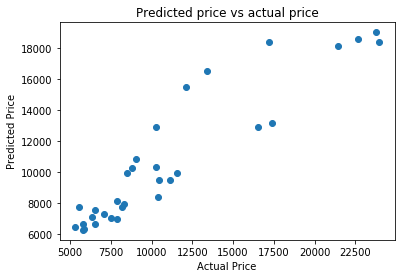

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Predicted price vs actual price")
plt.show()

In [60]:
torch.save(model, 'my_model')


In [62]:
saved_model = torch.load('my_model')


In [64]:
y_pred_tensor = saved_model(x_test_tensor)

In [65]:
y_pred = y_pred_tensor.detach().numpy()

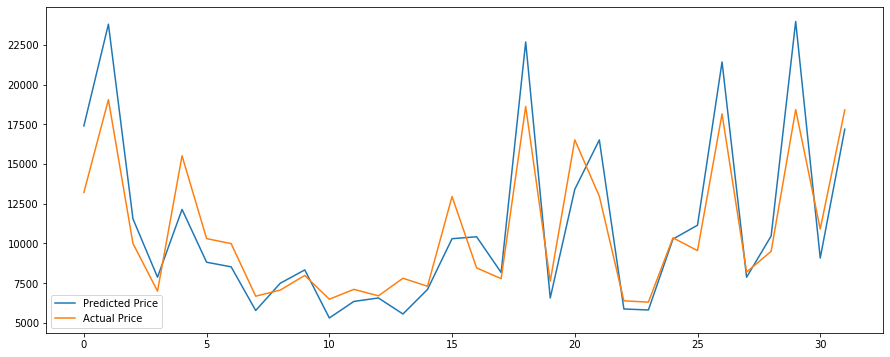

In [66]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test.values, label='Actual Price')

plt.legend()
plt.show()